In [1]:
# Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# URL for GET requests to retrieve data for Covid 19 cases from centre for diesase control and prevention
url = "https://data.cdc.gov/resource/n8mc-b4w4.json?res_state=NJ&case_month=2021-06&$limit=20000"


In [3]:
# Print the response object to the console
response = requests.get(url)
print( response.url)

https://data.cdc.gov/resource/n8mc-b4w4.json?res_state=NJ&case_month=2021-06&$limit=20000


In [4]:
# New Jersey Data 

data = response.json()

data_df = pd.DataFrame(data)

data_df

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-06,NJ,34,CUMBERLAND,34011,18 to 49 years,Female,NA,NA,0.0,Missing,Missing,Probable Case,Symptomatic,No,Missing,No,NaN
1,2021-06,NJ,34,CUMBERLAND,34011,18 to 49 years,Female,NA,NA,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
2,2021-06,NJ,34,CUMBERLAND,34011,18 to 49 years,Female,NA,NA,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
3,2021-06,NJ,34,CUMBERLAND,34011,18 to 49 years,Female,NA,NA,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
4,2021-06,NJ,34,CUMBERLAND,34011,18 to 49 years,Female,NA,NA,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5499,2021-06,NJ,34,NA,NA,18 to 49 years,NA,NA,NA,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
5500,2021-06,NJ,34,NA,NA,18 to 49 years,NA,NA,NA,NaN,Missing,Missing,Probable Case,Missing,Missing,Missing,No,NaN
5501,2021-06,NJ,34,NA,NA,18 to 49 years,NA,NA,NA,NaN,Missing,Missing,Probable Case,Missing,Missing,Missing,No,NaN
5502,2021-06,NJ,34,NA,NA,18 to 49 years,NA,NA,NA,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN


In [5]:
# New Jersey data for hospitalisation 
df_hosp = data_df["hosp_yn"].value_counts()
df_hosp


No         2685
Missing    2479
Yes         340
Name: hosp_yn, dtype: int64

In [6]:
# No of cases 
no_cases = data_df["res_state"].count()
df_cases = pd.DataFrame({"Total no. of cases in sample":[no_cases]})
df_cases

,Total no. of cases in sample
0,5504


In [7]:
set(data_df.columns)

{'age_group',
 'case_month',
 'case_onset_interval',
 'county_fips_code',
 'current_status',
 'death_yn',
 'ethnicity',
 'exposure_yn',
 'hosp_yn',
 'icu_yn',
 'process',
 'race',
 'res_county',
 'res_state',
 'sex',
 'state_fips_code',
 'symptom_status',
 'underlying_conditions_yn'}

In [8]:
number_of_hospitalisation = data_df[['res_county','hosp_yn','death_yn']]
number_of_hospitalisation

,res_county,hosp_yn,death_yn
0,CUMBERLAND,No,No
1,CUMBERLAND,No,No
2,CUMBERLAND,No,No
3,CUMBERLAND,No,No
4,CUMBERLAND,Yes,No
...,...,...,...
5499,NA,Missing,No
5500,NA,Missing,No
5501,NA,Missing,No
5502,NA,Missing,No


In [17]:
# Number of cases as per county by Groupby
cases_county = data_df["res_county"].value_counts()
print("----------------------")
print(cases_county)

cases_percentage = ( cases_county / 20000 ) * 100
print("----------------------")
print(cases_percentage)

temp = number_of_hospitalisation[number_of_hospitalisation["hosp_yn"] == "Yes"]
county_number=temp.groupby(['res_county']).count()                         
#dataframe[dataframe["column"] == value]

print("----------------------")
print(temp)
print("----------------------")
print(temp["hosp_yn"])
print("----------------------")
print(temp["hosp_yn"].value_counts())
print("----------------------")
temp1 = temp["hosp_yn"].value_counts()

county_df = pd.DataFrame({"Total Number of Cases per County": cases_county, "Percentage": cases_percentage, "Hospitalisation": temp1})
                          
county_df_descending = county_df.sort_values('Total Number of Cases per County',ascending=False)
                          
print(county_df_descending.round())
county_number


----------------------
MONMOUTH      258
ESSEX         224
PASSAIC       187
MIDDLESEX     179
OCEAN         175
BERGEN        153
CAMDEN        140
BURLINGTON    119
HUDSON        104
UNION          98
MORRIS         96
CUMBERLAND     77
MERCER         71
SOMERSET       68
SUSSEX         64
GLOUCESTER     60
ATLANTIC       48
CAPE MAY       48
HUNTERDON      44
NA             43
WARREN         22
SALEM           7
Name: res_county, dtype: int64
----------------------
MONMOUTH      1.290
ESSEX         1.120
PASSAIC       0.935
MIDDLESEX     0.895
OCEAN         0.875
BERGEN        0.765
CAMDEN        0.700
BURLINGTON    0.595
HUDSON        0.520
UNION         0.490
MORRIS        0.480
CUMBERLAND    0.385
MERCER        0.355
SOMERSET      0.340
SUSSEX        0.320
GLOUCESTER    0.300
ATLANTIC      0.240
CAPE MAY      0.240
HUNTERDON     0.220
NA            0.215
WARREN        0.110
SALEM         0.035
Name: res_county, dtype: float64
----------------------
      res_county hosp_yn death_

,hosp_yn,death_yn
res_county,,
ATLANTIC,11,11
BERGEN,31,31
BURLINGTON,23,23
CAMDEN,20,20
CAPE MAY,4,4
CUMBERLAND,6,6
ESSEX,31,31
GLOUCESTER,18,18
HUDSON,25,25


In [10]:
# cleaning the data filterating values nah values out of data notna will return true and false value.
#notna will be false ,will clean the data.

data_df = data_df[data_df['case_onset_interval'].notna()]
data_df

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-06,NJ,34,CUMBERLAND,34011,18 to 49 years,Female,NA,NA,0.0,Missing,Missing,Probable Case,Symptomatic,No,Missing,No,NaN
1,2021-06,NJ,34,CUMBERLAND,34011,18 to 49 years,Female,NA,NA,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
2,2021-06,NJ,34,CUMBERLAND,34011,18 to 49 years,Female,NA,NA,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
3,2021-06,NJ,34,CUMBERLAND,34011,18 to 49 years,Female,NA,NA,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
4,2021-06,NJ,34,CUMBERLAND,34011,18 to 49 years,Female,NA,NA,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5469,2021-06,NJ,34,NA,NA,NA,NA,NA,NA,0.0,Missing,Missing,Probable Case,Symptomatic,No,Missing,No,NaN
5482,2021-06,NJ,34,NA,NA,NA,NA,NA,NA,0.0,Missing,Missing,Probable Case,Symptomatic,No,Missing,No,NaN
5486,2021-06,NJ,34,NA,NA,NA,NA,NA,NA,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
5489,2021-06,NJ,34,NA,NA,NA,NA,NA,NA,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,No,NaN


Text(0, 0.5, 'Number of Cases')

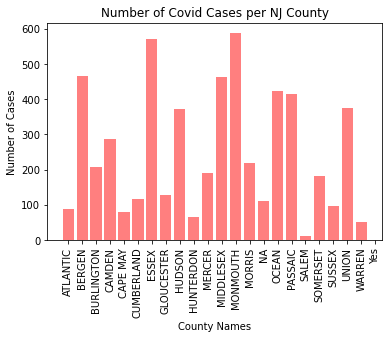

In [11]:
#coorelation between number of cases and hospitalisation
# Give chart  labels and a tile

county = county_df.index.to_list()

cases = county_df["Total Number of Cases per County"]
x_axis = np.arange(len(cases))
plt.xticks(rotation='vertical')
plt.bar(county, cases, color='r', alpha=0.5, align="center")
plt.title("Number of Covid Cases per NJ County")
plt.xlabel("County Names")
plt.ylabel("Number of Cases")

In [ ]:
#This graph is showing number of hospital cases are very coorelated with county names 